In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
from PIL import Image

#Tắt cái cảnh báo DecompressionBombWarning cho những bức hình quá lớn
warnings.simplefilter('ignore', Image.DecompressionBombWarning)

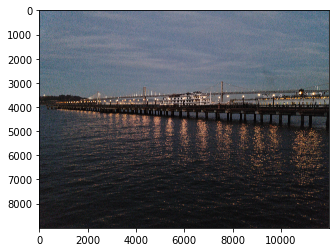

In [ ]:
#Đọc ảnh và in ảnh ra cho dễ nhìn
image_path = 'file ảnh test.jpg'
mypic=plt.imread(image_path)
plt.imshow(mypic)

In [ ]:
mypic = mypic/255.0

In [ ]:
import os
import enum

class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4
def convert_unit(size_in_bytes, unit):
   """ Chuyển kiểu dữ liệu của file từ bytes về các kiểu như KB, MB,GB  """
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes
def get_file_size(file_name, size_type = SIZE_UNIT.BYTES ):
   size = os.path.getsize(file_name) #Lấy dung lượng của file sang byte
   return convert_unit(size, size_type)

In [ ]:
size_type_str = 'MB'
if size_type_str == 'KB':
  size_type = SIZE_UNIT.KB
elif size_type_str == 'MB':
  size_type = SIZE_UNIT.MB
elif size_type_str == 'GB':
  size_type = SIZE_UNIT.GB
else:
  size_type = SIZE_UNIT.BYTES     
print("Memory size of image:",get_file_size(image_path,size_type),size_type_str)

Memory size of image: 71.6430892944336 MB


In [ ]:
mypic.shape

(9000, 12000, 3)

In [ ]:
#Vì là ảnh màu được tạo ra từ 3 ma trận (3 ma trận đó là những màu đỏ, xanh lá và xanh dương)
#Ta chia làm 3 ma trận (ứng với 3 ma trận màu) đều có kích thước giống với kích thước của bức ảnh VD là 720*1280
mypic_red=mypic[:,:,0]
mypic_green=mypic[:,:,1]
mypic_blue=mypic[:,:,2]

In [ ]:
#tính toán các phần tử U,S,V cho từng thành phần màu
U_red, s_red, V_red=np.linalg.svd(mypic_red)  
U_green, s_green, V_green=np.linalg.svd(mypic_green)
U_blue, s_blue, V_blue=np.linalg.svd(mypic_blue)

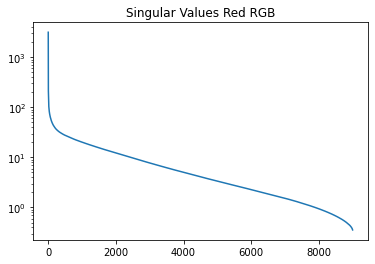

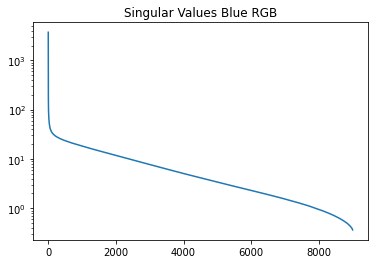

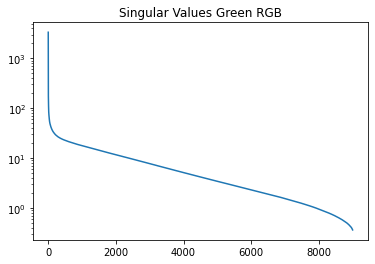

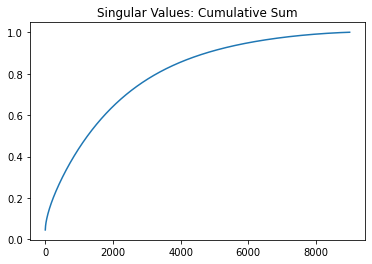

In [ ]:
#Xem tỉ lệ nén 
S_red = np.diag(s_red)
S_blue = np.diag(s_blue)
S_green = np.diag(s_green)

S = S_red + S_blue + S_green
compression_ratio = np.cumsum(np.diag(S))/np.sum(np.diag(S))

#Xem các Singular Values ( ở đây là các ơ trong S)
#Màu đỏ
plt.figure(1)
plt.semilogy(np.diag(S_red))
plt.title('Singular Values Red RGB')
plt.show()

#Màu xanh dương
plt.figure(2)
plt.semilogy(np.diag(S_blue))
plt.title('Singular Values Blue RGB')
plt.show()

#Màu xanh lá
plt.figure(3)
plt.semilogy(np.diag(S_green))
plt.title('Singular Values Green RGB')
plt.show()

#Tỉ lệ giống ảnh thật 
plt.figure(4)
plt.plot(compression_ratio)
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [ ]:
#Hàm dùng để biểu diễn kết quả sau khi nén 
def compress(rank):
    #rank này hiểu đơn giản nó là giá trị mà ảnh hướng tới chất lượng ảnh khi nén
    compress_red=U_red[:, :rank]@ np.diag(s_red[:rank])@V_red[:rank, :] 
    compress_red=compress_red.astype(float)
    
    compress_blue=U_blue[:, :rank] @ np.diag(s_blue[:rank])@V_blue[:rank, :]
    compress_blue=compress_blue.astype(float)

    compress_green=U_green[:, :rank]@ np.diag(s_green[:rank])@V_green[:rank, :]
    compress_green=compress_green.astype(float)

    compressed_array=np.stack((compress_red,  compress_green, compress_blue), axis=2)
    
    #rows,cols = np.shape(mypic_red)
    #compression_ratio = 100*rank*(rows + cols+1)/(rows * cols)
    
    #Xem tỉ lệ nén ảnh ứng với từng rank
    print("Compression percent:", str(compression_ratio[rank-1] *100) +'%')
    
    #Dùng để chỉnh sửa cái mảng(hình ảnh ) có các phần tử nằm trong khoảng từ [0,1]
    compressed_array = compressed_array/np.amax(compressed_array)
    compressed_array = np.clip(compressed_array, 0, 1)
    plt.imshow(compressed_array) #Vẽ hình
    compressed_image = "image compression.jpg"
    plt.imsave(compressed_image, compressed_array) #dùng để lưu hình
    print("Memory size of image after compression:",get_file_size(compressed_image,size_type),size_type_str)

Compression percent: 4.580951035719122%
Memory size of image after compression: 4.8211822509765625 MB


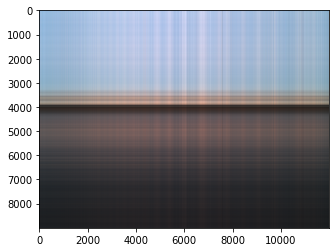

In [ ]:
compress(1)

Compression percent: 99.99999999999996%
Memory size of image after compression: 27.729140281677246 MB


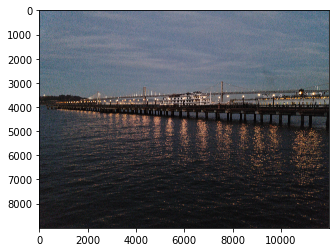

In [ ]:
compress(9000)

In [ ]:
from ipywidgets import interact #Dùng để thay đổi cái giá trị  rank 

interact(compress, rank=(1,mypic.shape[0]))

interactive(children=(IntSlider(value=4500, description='rank', max=9000, min=1), Output()), _dom_classes=('wi…

<function __main__.compress>

In [ ]:
#Xem tỉ lệ giống nhau của  hình ảnh nén với ảnh gốc
from skimage.metrics import structural_similarity

import imutils

import cv2 
from google.colab.patches import cv2_imshow

compressed_image = "image compression.jpg"
image1 = cv2.imread(image_path)
image2 = cv2.imread(compressed_image)
#final_frame = cv2.hconcat((image1,image2))
#cv2_imshow(final_frame)

(score, diff) = structural_similarity(image1,image2,full = True,multichannel = True)
print("Structural Similarity Index: {} ".format(score*100)+str('%'))

Structural Similarity Index: 95.42037761375215 %
